# Imports & Load Dataset

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [39]:
df = pd.read_csv(r'Admission_Predict.csv')

# Data Exploration

In [40]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
# drop the serial no. column
df.drop('Serial No.', axis=1, inplace=True)

In [42]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
# checking for null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [44]:
# general info and datatypes of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [45]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [46]:
# group by university rating
df_university = df.groupby('University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


# Data Visualization

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

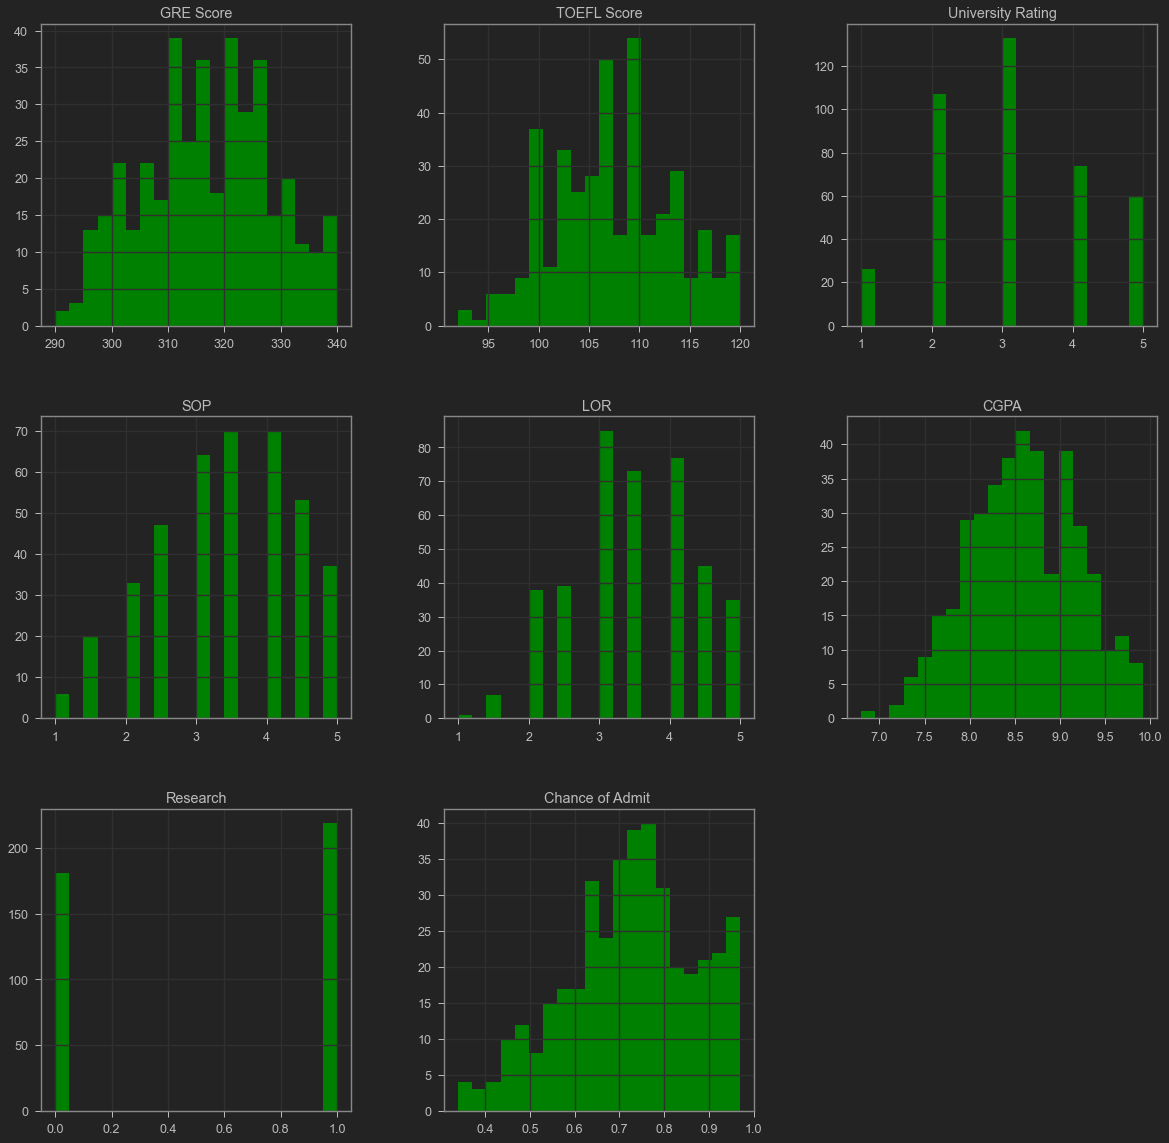

In [29]:
df.hist(bins=20, figsize=(20,20), color='green')

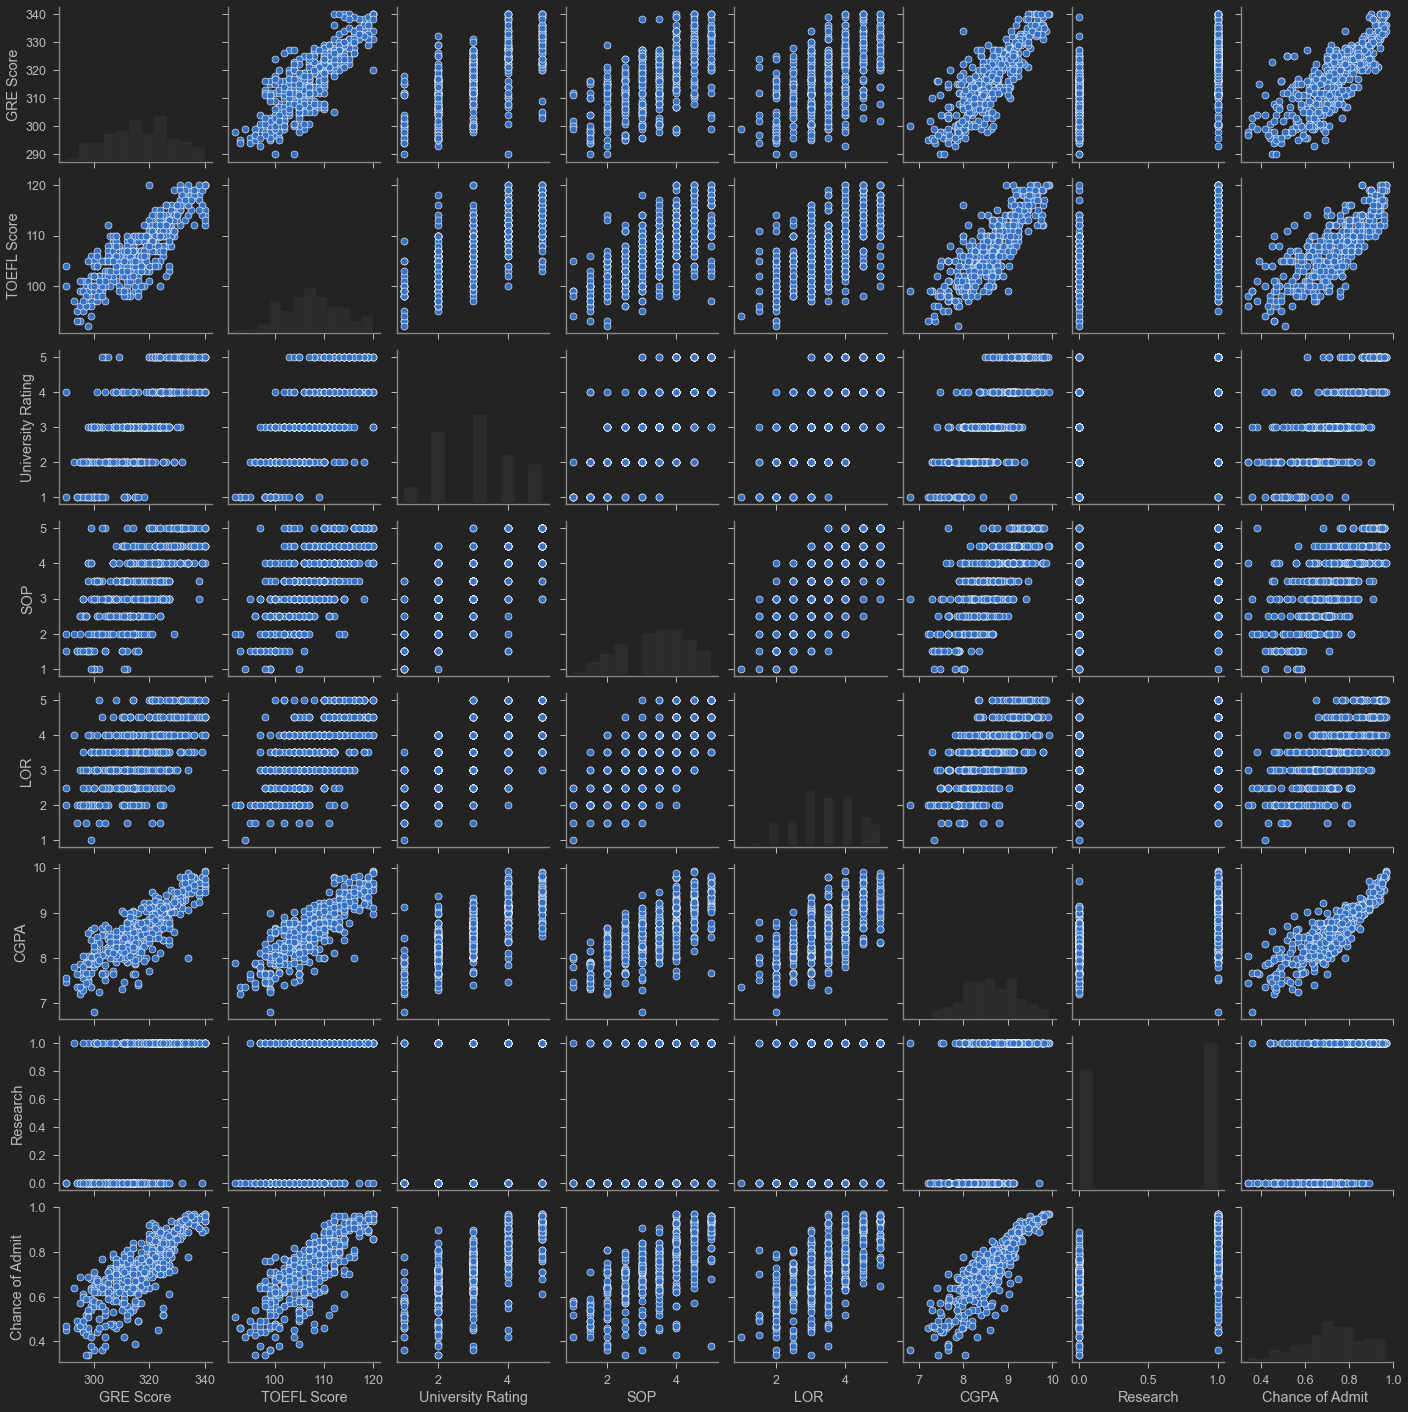

In [31]:
# pairplot with hue sex
sns.pairplot(df)
# to show
plt.show()

<AxesSubplot:>

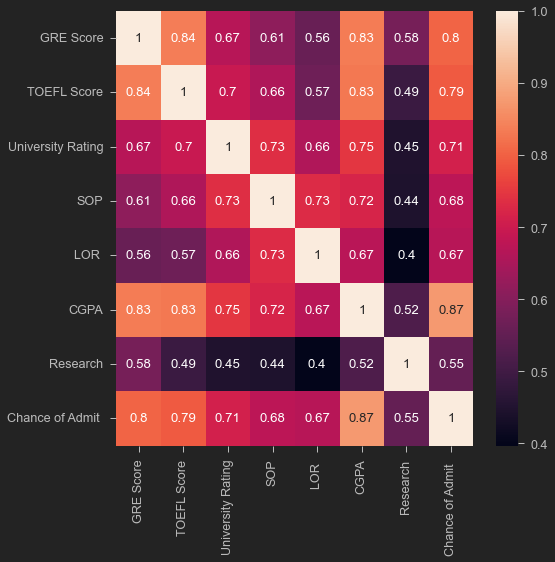

In [36]:
corr_matrix = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True)

# Split Training and Test Data

In [51]:
# split the data in the output variable and features
X = df.drop(columns=['Chance of Admit ']).values
y = df['Chance of Admit '].values

In [56]:
# reshape and check shape for sklearn
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(400, 7)
(400, 1)


In [60]:
# scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [61]:
# split the data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15) 

# Train and Evaluate the Data

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [65]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [67]:
accuracy_linear_regression = linear_regression_model.score(X_test, y_test)
print(accuracy_linear_regression)

0.7486247201519345


# Improve the Model

In [91]:
df2 = pd.read_csv(r'Admission_Predict.csv')

In [93]:
# drop the serial no. column
df2.drop('Serial No.', axis=1, inplace=True)

In [94]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [95]:
df2['squared'] = df2['GRE Score'] * df2['University Rating']

In [96]:
# split the data in the output variable and features
X2 = df2.drop(columns=['Chance of Admit ']).values
y2 = df2['Chance of Admit '].values

In [97]:
# reshape and check shape for sklearn
y2 = y2.reshape(-1,1)

In [98]:
# scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
y2 = scaler.fit_transform(y2)

In [99]:
# split the data
from sklearn.model_selection import train_test_split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2) 

In [100]:
linear_regression_model2 = LinearRegression()
linear_regression_model2.fit(X2_train, y2_train)

LinearRegression()

In [101]:
accuracy_linear_regression2 = linear_regression_model2.score(X2_test, y2_test)
print(accuracy_linear_regression2)

0.7427445649219571


In [102]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

### L2 Ridge

In [103]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X2_train, y2_train)
    scores = cross_val_score(ridgeModel, X2, y2, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 77.03849500469782
0.5 : 77.05086285704427
0.75 : 77.057051430871
1.0 : 77.06176309467492
1.25 : 77.06594112370992
1.5 : 77.0698548444204
1.75 : 77.07359839555191
2.0 : 77.0772094288367


### L1 Lasso

In [104]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X2_train, y2_train)
    scores = cross_val_score(lassoModel, X2, y2, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))


0.25 : 69.65660832684219
0.5 : 46.923967538788055
0.75 : 10.587214614256597
1.0 : -12.768477764868685
1.25 : -12.768477764868685
1.5 : -12.768477764868685
1.75 : -12.768477764868685
2.0 : -12.768477764868685


# Build a Neural Network

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam


ModuleNotFoundError: No module named 'tensorflow'

In [69]:
pip install tensorflow

  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vande\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstalling google-auth-2.6.0:
      Successfully uninstalled google-auth-2.6.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

In [ ]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
epochs_hist.history.keys()

In [ ]:
epochs_hist.history.keys()

# Use Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
accuracy_decision_tree_model = decision_tree_model.score(X_test, y_test)
print(accuracy_decision_tree_model)

0.4921594588989743


In [76]:
from sklearn.ensemble import RandomForestRegressor 
random_forest_regression_model = RandomForestRegressor(n_estimators=100, max_depth=10)
random_forest_regression_model.fit(X_train, y_train)

C:\Users\vande\AppData\Local\Temp\ipykernel_20260\1332340839.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regression_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [77]:
accuracy_random_forest_regression_model = random_forest_regression_model.score(X_test, y_test)
print(accuracy_random_forest_regression_model)

0.7362838973539026


# KPIs

In [79]:
y_predict = linear_regression_model.predict(X_test)

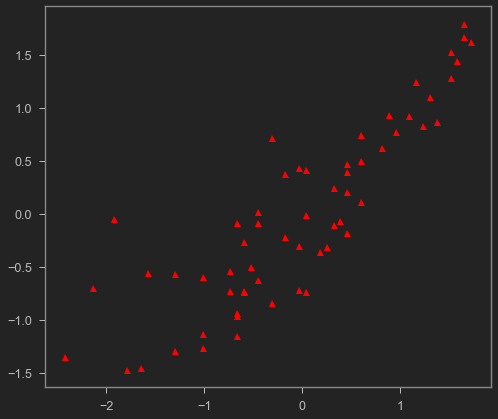

In [81]:
plt.plot(y_test, y_predict, '^',color='red')

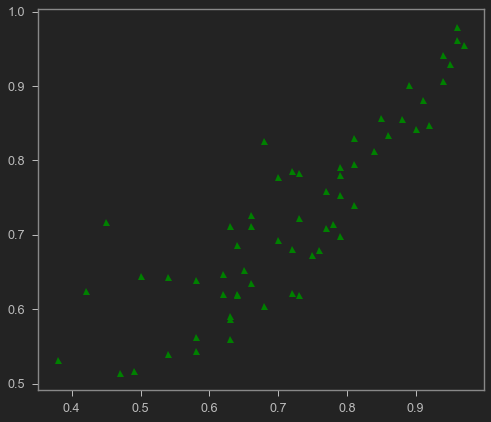

In [85]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^',color='green')

In [86]:
k = X_test.shape[1]
n = len(X_test)
n

60

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


In [87]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.072 
MSE = 0.005252654055945229 
MAE = 0.05190486546280333 
R2 = 0.7486247201519344 
Adjusted R2 = 0.714785740172387


In [89]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)
print(X.shape)

(4, 1)
